In [1]:
import random
# import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Nodes:
    
    """ Nodes exposure, updating and dying, edges removing. """
    
    
    def __init__(self, exposure=None, welfare=None):
        if exposure is None:
            exposure = random.uniform(-1, 1)
        self.exposure = exposure
        self.welfare = self.exposure * stock_price
        self.edges = []
        self.has_connected = False

        
    def add_edges(self, other_node):
        closest_node = min(
            [node for node in other_node if node.exposure * self.exposure < 0],
            key=lambda node: abs(node.exposure + self.exposure),
            default=None
        )
        if closest_node:
            edge = Edges(self, closest_node, abs(self.exposure + closest_node.exposure))
            self.edges.append(edge)
            closest_node.edges.append(edge)
            self.has_connected = True
            closest_node.has_connected = True


    def update_exposure(self):
        self.exposure += random.uniform(-0.5, 0.5)
        self.welfare = self.exposure * stock_price

        
    def death(self):
        death_threshold = 2
        # the threshold value still need to adjust, for example, why do we set that equaling to 2?
        if self.exposure > death_threshold:
            network.remove_node(self)
            
            
    def remove_edges(self):
        for edge in self.edges:
            if edge.node1 == self:
                edge.node2.edges.remove(edge)
            else:
                edge.node1.edges.remove(edge)
        self.edges.clear()
            
            
    def reset_connection(self):
        self.has_connected = False
        

In [3]:
class Edges:
    
    def __init__(self, node1, node2, weight):
        self.node1 = node1
        self.node2 = node2
        self.weight = weight


In [14]:
class Networks:
    
    """Network updating."""

    
    def __init__(self, n):
        self.nodes = [Nodes() for _ in range(n)]
        for node in self.nodes:
            node.add_edges(self.nodes)
        
        
    def remove_node(self, node):
        node.remove_edges()
        self.nodes.remove(node)
        
  
    def update_network(self):
        for node in list(self.nodes):
            node.reset_connection()

        for node in self.nodes:
            node.add_edges(self.nodes)
            node.update_exposure()
            node.death()

            
    def simulate(self, steps):
        node_counts = []
        for _ in range(steps):
            self.update_network()
            node_counts.append(len(self.nodes))
        return node_counts
            

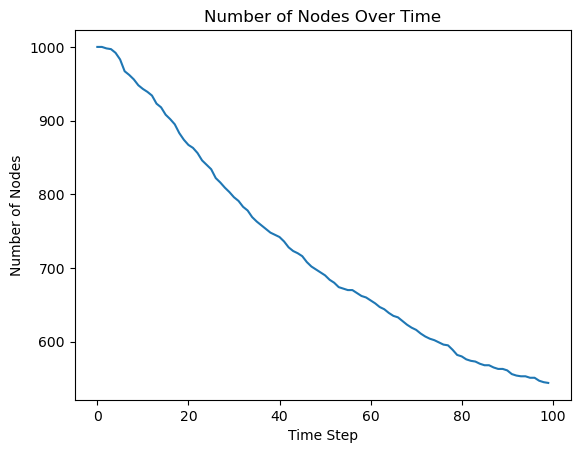

In [15]:
stock_price = 12

network = Networks(1000)
node_counts = network.simulate(100)

plt.plot(node_counts)
plt.xlabel('Time Step')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes Over Time')
plt.show()